In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation
from IPython.display import HTML
from numba import jit, types
from scipy.sparse import diags
from scipy.integrate import quad
matplotlib.rcParams['animation.embed_limit'] = 2**128

from Wave_func_propagation import *
from Animation_func import *
from Transmiton_prob import *
from Fourier_transform import *

In [12]:
elementary_charge = 1.602176634e-19
hbar = 1.054571817e-34 # J s
m = 9.1093837015e-31 # kg
#m = 0.510998950e6
Energi_init = 17.5e-3 * elementary_charge# J
sigma_x = 200e-10
x_s = 40e-8
k_0 = np.sqrt(2*m*Energi_init)/hbar

L = 1200e-9

well_size = 6e-9
barrier_size = 1.2e-9
barrier_hight = 90e-3*elementary_charge
K = 5
C = 0.1

In [13]:
# @jit
def Harmonic_Two_Potential_Barrier(x_axis, dx, time, Potential):

    #pot = np.zeros((len(time), len(x_axis)))
    pot = np.zeros(len(x_axis))
    middel = len(x_axis)/2 *dx
    barrier = Potential[0]
    well = Potential[1]

    left_edge_left = middel - (well/2 + barrier)
    righ_edge_left = middel - (well/2)
    left_edge_righ = middel + (well/2)
    righ_edge_righ = middel + (well/2 + barrier)

    righ_edge_righ_i = np.searchsorted(x_axis, righ_edge_righ, side='right')
    left_edge_righ_i = np.searchsorted(x_axis, left_edge_righ, side='right')
    righ_edge_left_i = np.searchsorted(x_axis, righ_edge_left, side='right')
    left_edge_left_i = np.searchsorted(x_axis, left_edge_left, side='right')

    pot[left_edge_left_i : righ_edge_left_i], pot[left_edge_righ_i : righ_edge_righ_i] = Potential[2], Potential[2]


    return pot, Potential[2]


# Potential_size = np.array([barrier_size, well_size, barrier_hight,5e-3 * elementary_charge,5e-3 * elementary_charge])
# N_x = 15*int(2*k_0*L) + 1 
# dx = L/(N_x-1)
# v_g = hbar * k_0/m
# x_axis = np.linspace(0.0, L, N_x, dtype=np.float64)

# dt = 0.1 * hbar / ((hbar**2/(2*m*dx**2))+Potential_size[2])
# T = 1.4*L/(2*v_g)
# N_t = int(T/dt)
# time =  np.linspace(0,T,N_t)

# pot, v_max = Harmonic_Two_Potential_Barrier(x_axis, dx, time[-1], Potential_size)

# plt.figure(figsize=(10,5))
# plt.title('The static Potential', fontsize=20)
# plt.plot(x_axis,pot, label = 'Potential')
# plt.xlim(895e-9,905e-9)
# plt.xlabel('Lenght/ ${\mu}m$', fontsize=15)
# plt.ylabel('Potential/${eV}$', fontsize=15)
# plt.legend(shadow=True, loc='upper right')
# plt.show()

In [20]:
def Haromnic_ocs_set_up(n, hbar, mass, well):

    E_resonance = (n*np.pi*hbar)**2 / (2*mass * well**2)

    omega = (2*elementary_charge) / hbar
    V1 = 11e-3 * elementary_charge

    phase_shift = 4*np.pi/8

    return E_resonance, omega, V1, phase_shift
print((3*np.pi*hbar)/np.sqrt(2*m*80e-3*elementary_charge))

# new omega must be around 30.700000000000003 meV
# new V1 must be around 1 meV

6.50410587571749e-09


In [21]:
E_resonance, omega, V1, phase_shift = Haromnic_ocs_set_up(2, hbar, m, well_size)
print(E_resonance/elementary_charge*1e3,omega)

Potential_size = np.array([barrier_size, well_size, barrier_hight, V1, omega, phase_shift])


41.7811291284373 3038534897619021.0


In [22]:
Psi_t1, psi_imag_t1, psi_real_t1, x, dx, T, N_t, harm_pot_animat = Psi_propagation(Psi_initial, Harmonic_Two_Potential_Barrier, sigma_x, 
                                                                                        x_s, hbar, m, L, k_0, K, C, Potential_size, t_dep_pot=True)

a,b,c = probability_density(Psi_t1, -1, dx, Potential_size, x)
print('Transmission probability is:',b*100,'%')

Transmission probability is: 0.22222544250935344 %


In [ ]:


probability_tot, normalisation_trans, normalisation_reflec = probability_density(Psi_t1, -1, dx, Potential_size, x)

a,b,c = probability_density(Psi_t1, -1, dx, Potential_size, x)
print('Transmission probability is:',b*100,'%')

print(harm_pot_animat.shape)
ani = animate_system(elementary_charge,x, harm_pot_animat, np.abs(Psi_t1), 6.5e23, title='Transmission for 2 barrier harmonic potential',
                      limits = [-0.01e-6,1.21e-6, -15, 10000], t_dep_pot=True)
# ani.save('Transmission for 2 barrier harmonic potential.gif', writer='imagemagick')
HTML(ani.to_jshtml())


In [ ]:
plt.plot(x,np.abs(Psi_t1[1000])**2)
# plt.xlim(0.75e-6,1.25e-6)
# plt.ylim(0,3e4)

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(x, (harm_pot_animat[1500])/elementary_charge*1000 , label = 'Potential')
plt.xlim(595e-9,606e-9)
plt.title('The static Potential', fontsize=20)
plt.xlabel('Lenght/ ${\mu}m$', fontsize=15)
plt.ylabel('Potential/${eV}$', fontsize=15)
plt.legend(shadow=True, loc='upper right')
plt.ylim(-11,12)
plt.show()

In [ ]:
# start = np.linspace(0,omega,40)
# dw = start[1]-start[0]
# end = np.linspace(omega+dw,omega*3,40)
frequencies = np.arange(0,101e-3,1e-3)

frequencies = (frequencies * elementary_charge)/ hbar
# print(frequencies[30])


transmiton_2_barier_omegas = transmition_for_omega(Harmonic_Two_Potential_Barrier, frequencies,  sigma_x, x_s, hbar, m, L, k_0, barrier_size, well_size,
                                            barrier_hight, 0)


In [ ]:

plt.plot(frequencies*hbar/elementary_charge,transmiton_2_barier_omegas)
print(transmiton_2_barier_omegas[0])
#plt.xlim(0.1e28,2e28)
#plt.ylim(0,)


In [ ]:
amplitudes = np.arange(0,0.1,1e-3)
amplitudes = amplitudes * elementary_charge

transmiton_2_barier_V1 = transmition_for_V1(Harmonic_Two_Potential_Barrier, amplitudes,  sigma_x, x_s, hbar, m, L, k_0, barrier_size, well_size,
                                            barrier_hight, omega, phase_shift)


In [ ]:
plt.plot(amplitudes/elementary_charge, transmiton_2_barier_V1*100)
plt.title('Transmition probaility for $\omega=1meV$')
plt.xlabel('V1 from 0-90meV')
plt.ylabel('Transmission probability/%')
print(np.max(transmiton_2_barier_V1),transmiton_2_barier_V1[0])

In [ ]:
phase_shifting = np.arange(0,180,1)
phase_shifting = phase_shifting * (np.pi)/180

transmiton_2_barier_phaes = transmition_for_phase(Harmonic_Two_Potential_Barrier, phase_shifting, sigma_x, x_s, hbar, m, L, k_0, barrier_size, well_size, barrier_hight, omega, V1)

In [ ]:

plt.plot(phase_shifting*180/(np.pi), transmiton_2_barier_phaes)
plt.title('Transmission probaility for $\omega=1meV$ and $V_1 =36meV$')
plt.xlabel('Phase shift from $0-180\degree$')
plt.ylabel('Transmission probability/%')

In [ ]:
def transmition_for_Omega_V1(Harmonic_Two_Potential_Barrier, amplitudes,  sigma_x, x_s, hbar, m, L, k_0, barrier_size, well_size,
                            barrier_hight, omega):

    T_omega_V1 = np.zeros((len(omega),len(amplitudes)))

    for i in range(len(omega)):
        print('Round:',i+1)
        T_omega_V1[i,:] = transmition_for_V1(Harmonic_Two_Potential_Barrier, amplitudes,  sigma_x, x_s, hbar, m, L, k_0, barrier_size, well_size,
                                            barrier_hight, omega[i], phase_shift)
        
    return T_omega_V1

frequencies = np.arange(9e-3,15e-3,5e-5)
print(frequencies.shape)
frequencies = (frequencies * elementary_charge)/ hbar

amplitudes = np.arange(0,0.01,1e-3)
print(amplitudes.shape)
amplitudes = amplitudes * elementary_charge
test = transmition_for_Omega_V1(Harmonic_Two_Potential_Barrier, amplitudes,  sigma_x, x_s, hbar, m, L, k_0, barrier_size, well_size,
                            barrier_hight, frequencies)

In [ ]:
fig = plt.figure(figsize=(15,7))
gs = fig.add_gridspec(3, 10, hspace=0.1, wspace=0.25)
axes = gs.subplots(sharex=True, sharey=True)


# fig, axes = plt.subplots(10,10, figsize=(10,10), sharex=True, sharey=True, wspace=0.5)

for ax in axes.flat:
    ax.label_outer()


n = 0
for i in range(1):
    for j in range(1):
        
        axes[i,j].plot(amplitudes/elementary_charge, test[n]*100)
    
        n +=1

fig.suptitle('Transmission probability for $\omega$ between $0-30meV$ phase shfit 0' , fontsize=20)
fig.supxlabel('V1 from 0-05,eV')
# fig.supylabel('Transmission probability')

fig.text(0.08, 0.5, 'Transmission probability/$\%$', va='center', rotation='vertical', fontsize= 12)

plt.show() 

In [ ]:
plt.plot(amplitudes/elementary_charge, test[2]*100)
plt.xlim(0.005,0.015)

In [ ]:


energis = np.linspace(10e-3,30e-3,30)
energis = energis * elementary_charge

k_analytic = (np.sqrt(2*m*Potential_size[2])/hbar) * Potential_size[0]


transmition_harm_pot = transmition(Harmonic_Two_Potential_Barrier, energis, Potential_size, sigma_x, x_s, L, hbar, m, t_dep_pot=True)

In [ ]:

one = np.full(len(energis), 1)

plt.figure(figsize=(17,7))
plt.plot(energis/elementary_charge, transmition_harm_pot)
plt.plot(energis/elementary_charge, one)


In [ ]:
print(x.shape)

plt.figure(figsize=(17,7))
plt.plot(x, Psi_t1[-1])
# plt.ylim(-100,100)

In [23]:
def Fourier_transformed1(Wave, Desired_t, Dx, hbar, mass, x_axis, pot_size):

    left_barier, right_barier = int(len(x_axis)/2  - pot_size[0]/Dx - pot_size[1]/(Dx*2)), int(len(x_axis)/2  + pot_size[0]/Dx + pot_size[1]/(Dx*2))
    x_reflected = x_axis[:left_barier]
    x_transmited = x_axis[right_barier:]
    # print(int(len(x_axis)/2 - 500), left_barier*dx, right_barier*dx)

    Transformed_total = np.fft.fft(Wave[Desired_t,:],n=1000000)
    Transformed_reflected = np.fft.fft(Wave[Desired_t,:left_barier],n=1000000)
    Transformed_transmited = np.fft.fft(Wave[Desired_t,right_barier:],n=1000000)

    N = len(Transformed_total)
    freq = np.fft.fftfreq(N, Dx)

    firstNegInd = np.argmax(freq < 0)
    # freq_r = freq[firstNegInd:]
    freq = freq[:firstNegInd]
    Transformed_reflected = Transformed_reflected[::-1]
    Transformed_reflected =  Transformed_reflected[:firstNegInd]
    Transformed_transmited = Transformed_transmited[:firstNegInd]

    '''
    k_vec_sum_left = 0
    k_vec_sum_right = 0
    n = 0  
     
    test_count = 0
    test = 0
    #for i in range(0,int(N/2),1):
    for i in range(len(Transformed_reflected)):
        if np.abs(Transformed_reflected[i]) > 500:

            n +=1
            k_vec_sum_left += np.abs(freq[i])

    excepted_value_k_left = -(k_vec_sum_left*2*np.pi)/n
    Excpeted_Energi_left = (hbar * excepted_value_k_left)**2/(2*mass)
    #print(excepted_value_k_left, 'left', np.median(freq), Excpeted_Energi_left)


    
    n_righ = 0
    for i in range(len(Transformed_transmited)):
        if np.abs(Transformed_transmited[i]) > 1200:

            n_righ +=1
            k_vec_sum_right += (freq[i])
        
    if n_righ != 0:
        excepted_value_k_right = (k_vec_sum_right*2*np.pi)/n_righ
        Excpeted_Energi_right = (hbar * excepted_value_k_right)**2/(2*mass) 
        #print(excepted_value_k_right, 'right')

    else:
        Excpeted_Energi_right, excepted_value_k_right = 0.0, 0.0

    

    Excpeted_Energi_tot = np.mean([Excpeted_Energi_right, Excpeted_Energi_left]) #(hbar * (excepted_value_k_left + excepted_value_k_right))**2/(2*mass)
    #print((hbar * np.mean([excepted_value_k_right, excepted_value_k_left]))**2/(2*mass),'kkkkkkkkkk')



    n = 0
    k_vec_sum_total = 0
    d = np.where(Transformed_total==np.max(Transformed_total))[0][0]
    print(d)
    for i in range(len(Transformed_total)):
        if np.abs(Transformed_total[i]) > 1:

            n +=1
            k_vec_sum_total += (freq[i])

    excepted_value_k = (k_vec_sum_total*2*np.pi)/n
    Excpeted_Energi = (hbar * excepted_value_k)**2/(2*mass)
    # print(Excpeted_Energi,'total')
    if n_righ !=0:
        print('Excpeted Energy tot:', Excpeted_Energi_tot, 'Excpeted Energy left:', Excpeted_Energi_left,'Excpeted Energy right:', Excpeted_Energi_right)    
    else:
        print('Excpeted Energy tot:', Excpeted_Energi, 'Excpeted Energy left:', Excpeted_Energi_left,'Excpeted Energy right:', Excpeted_Energi_right)    
    '''
    
    freq = freq*2*np.pi

    
    return Transformed_reflected, Transformed_transmited, Transformed_total, freq#, Excpeted_Energi_tot

In [24]:
Transformed_reflected, Transformed_transmited, Transformed_total, freq = Fourier_transformed1(Psi_t1, -1, dx , hbar, m, x, Potential_size)
print(Energi_init, k_0)


2.8038091095000002e-21 677731319.8281631


In [25]:
# plt.figure(figsize=(17,7))
# #plt.plot(freq, Transformed_total, label = 'Total')
# plt.plot(freq, Transformed_reflected, label = 'Reflected')
# plt.plot(freq, Transformed_transmited, label = 'Transmited')
# # plt.xlim(-5e8, 5e8)
# # plt.ylim(-10000,10000)
# plt.legend()
# plt.show()

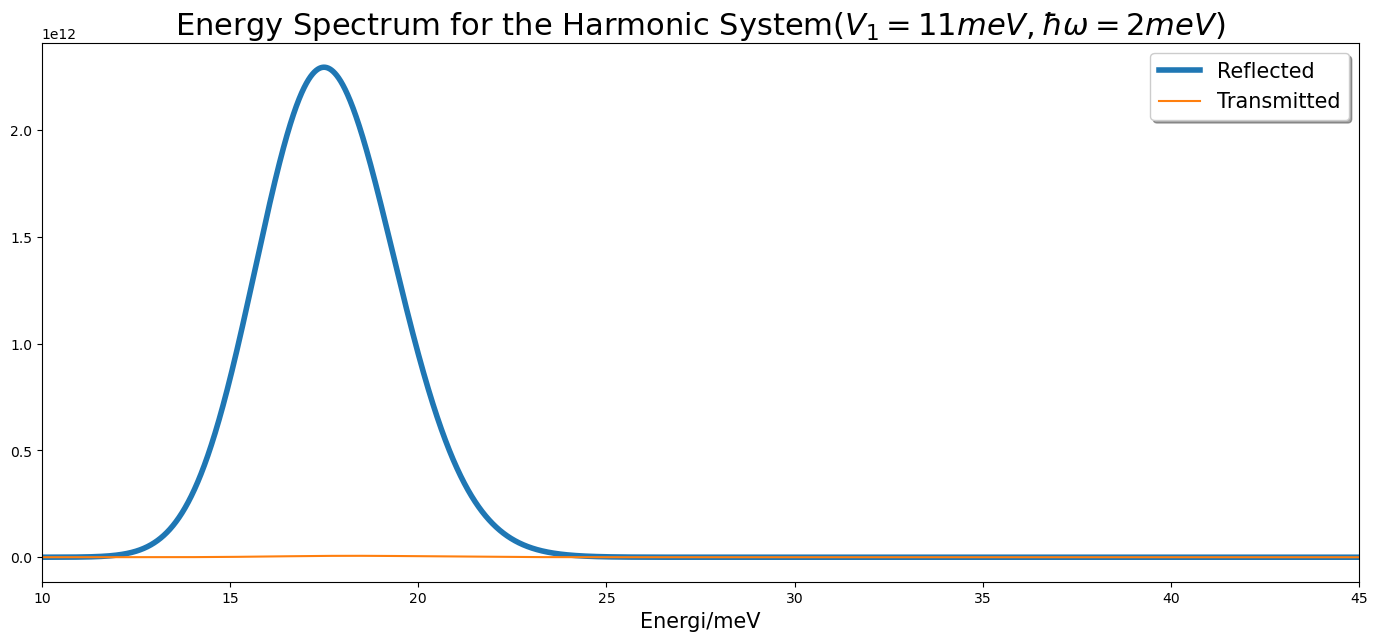

In [26]:
# Energi_reflected = (Transformed_reflected * hbar)/(2 * m)**2
# Energi_transmited = (Transformed_transmited * hbar)/(2 * m)**2
Energi_specture = ( (freq)* hbar)**2/(2 * m)


# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,7))
# ax1.set_xlim(0, 1e-1)
# ax1.plot(np.abs(Energi_specture)/elementary_charge, np.abs(Transformed_reflected)**2, label = 'Reflected')
# ax2.set_xlim(0, 1e-1)
# ax2.plot(Energi_specture/elementary_charge, np.abs(Transformed_transmited)**2, label = 'Transmited')


plt.figure(figsize=(17,7))
#plt.plot(freq, Transformed_total, label = 'Total')
plt.title('Energy Spectrum for the Harmonic System${(V_1 = 11meV,\hbar\omega =2meV)}$', fontsize= 22)
plt.plot(np.abs(Energi_specture)/elementary_charge*1e3, np.abs(Transformed_reflected)**2, linewidth=4, label = 'Reflected')
plt.plot(Energi_specture/elementary_charge*1e3, np.abs(Transformed_transmited)**2, label = 'Transmitted')
plt.xlim(10, 45)
# plt.ylim(0,2e10)
plt.xlabel('Energi/meV', fontsize=15)
# plt.ylabel('How much of each Energi', fontsize=15)

plt.legend(shadow=True, loc='upper right', prop={'size': 15})
plt.show()

In [ ]:
print((Energi_specture[np.where(Transformed_reflected==np.max(Transformed_reflected))[0][0]])/elementary_charge*1e3)

In [ ]:
print(np.mean([1.4476799887574684e-20,1.763138584037119e-20]))

q = np.zeros_like(x)
q[2545],q[2611] = 200, 300
plt.figure(figsize=(15,7))
plt.plot(x, np.abs(Psi_t1[-1]))
plt.plot(x, 1e24*harm_pot_animat[0])
# plt.plot(x,q)
# plt.xlim(2e-6,2.51e-6)
# plt.xlim(0,2.5e-7)
# plt.xlim(1.3e-6,1.5e-6)
plt.ylim(0,2000)

In [ ]:

def Fourier_integral(x_axis, wave, k):
    
    return wave[0] * np.exp(-1j*x_axis *k)

def Fourier_transformed111(Wave, Desired_t, Dx, hbar, mass, L, k_0, x_axis, pot_size):
    
    left_barier, right_barier = int(len(x_axis)/2 - pot_size[0]/2+1), int(len(x_axis)/2 + pot_size[0]/2+1)
    x_reflected = x_axis[:left_barier]
    x_transmited = x_axis[right_barier:]

    start = np.linspace(0,k_0,1000)
    dk = start[1]-start[0]
    end = np.linspace(k_0+dk,k_0*3,1000)
    k_value = np.insert(start, start.size, end)

    wave = Wave[Desired_t,:]

    for k in range(len(k_value)):

        a = quad(Fourier_integral, 0, L, args=(wave, k))
        print(a)
        transformed = 1/np.sqrt(2*np.pi) * a

    return transformed

Fourier_transformed(Psi_t1, 0, dx, hbar, m, L, k_0, x, Potential_size)

In [ ]:
def Fourier_transformed222(Wave, Desired_t, Dx, hbar, mass, L, k_0, x_axis, pot_size):
    
    left_barier, right_barier = int(len(x_axis)/2 - pot_size[0]/2+1), int(len(x_axis)/2 + pot_size[0]/2+1)
    x_reflected = x_axis[:left_barier]
    x_transmited = x_axis[right_barier:]

    start = np.linspace(0,k_0,1000)
    dk = start[1]-start[0]
    end = np.linspace(k_0+dk,k_0*3,1000)
    k_value = np.insert(start, start.size, end)
    k_value = np.arange(-1.5e9,1.5e9,1e3)

    wave = Wave[Desired_t,:]
    transformed = np.zeros_like(k_value)

    for k in range(len(k_value)):
        transformed[k] = 1/np.sqrt(2*np.pi) * np.sum(wave*np.exp(-1j*k*x_axis))* Dx
    return transformed, k_value

transformed, k_value = Fourier_transformed(Psi_t1, 0, dx, hbar, m, L, k_0, x, Potential_size)
print(k_0)
plt.figure(figsize=(17,7))
plt.plot(k_value,transformed)